### Problem Statement : Loan Approval Prediction Problem

type : Binary Classification because it has only two options i.e., yes or no for loan approval

***the dependent variable (i.e., Loan_Status) is categorical so this is classification problem.***

*why this ? it is a classic problem to learn and apply lots of data analysis techniques to create best classification model*

given with the dataset consisting of details of applicants for loan and status whether the loan application is approaved or not. Basis on the binary clsassifictaion model is to be created with maximum accuracy.

# step 1 -> import packages such as numpy, pandas, matplotlib, seaborn, sklearn, train_test_split, metrics

In [1]:
# basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# classifiers
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# model evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [4]:
# data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # or you can go with 'One-Hot Encoding' also
le = LabelEncoder()

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# step 2 -> load the dataset

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-main/loan_prediction.csv')
df.head(10)
# df.sample(25) # in dependents column, we could see that there are (3+ types) data which is declared as string type.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# step 3 -> explore the shape, dtypes, description of dataset & concept of visualization

In [7]:
df.shape

(614, 13)

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# data visualization with dependent variable matlab jab DV kr rhey ho to ek parameter mein dependent variable hona compulsory hai.

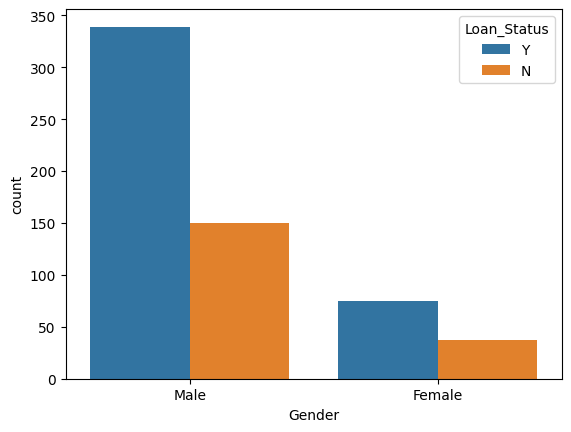

In [10]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show() # --> pata chalta hai ki male ko jada loan approve huye hain aur females ko kam

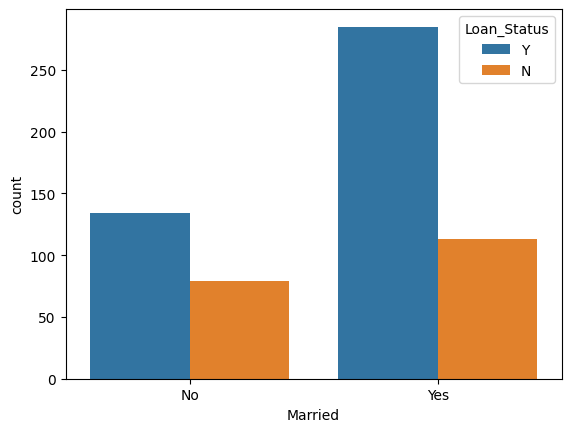

In [11]:
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.show() # --> ese hi ismein married ko jada loan aproave huye hain .

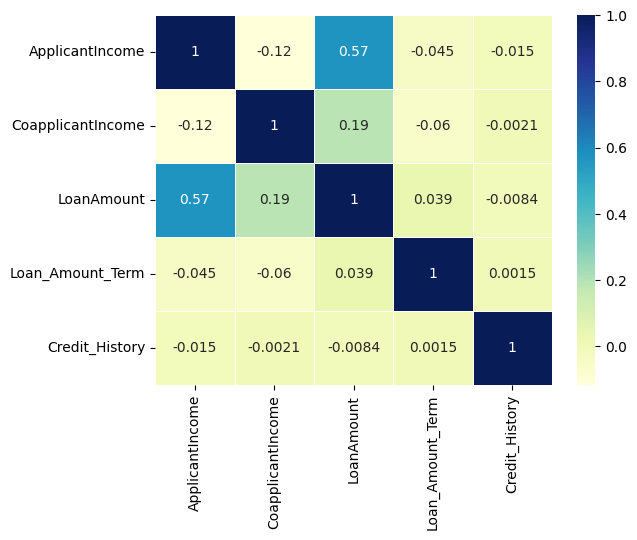

In [12]:
corr=df.corr() # agar ismein error aata hai to encoding krne ke baad error nahi ayega.
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='YlGnBu') # cmap = 'RdBu, BrBG, YlGnBu, Greens, Reds, Oranges, Blues'
plt.show()                                                           # 'RedBlue', 'BrownBlueGreen', 'YellowGreenBlue', same

# There is  positive correaltion between Applicant_Income and Loan_Amount, Co-Applicant_Income and Loan_Amount

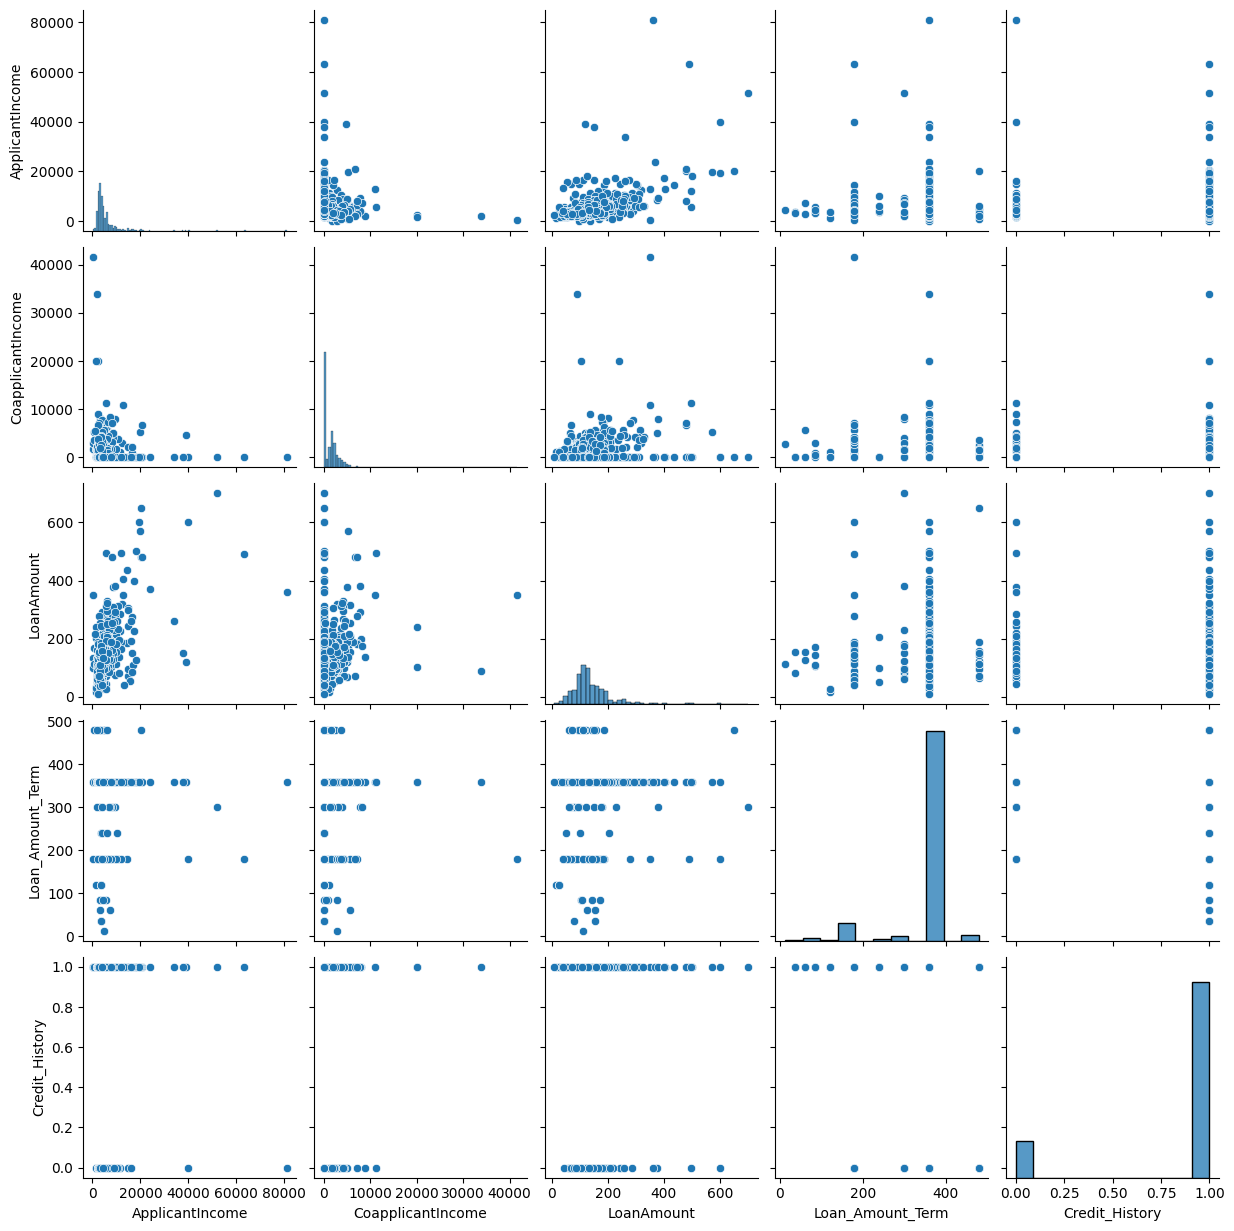

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.describe() # include='all' -> include all the columns if they are numerical or not

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

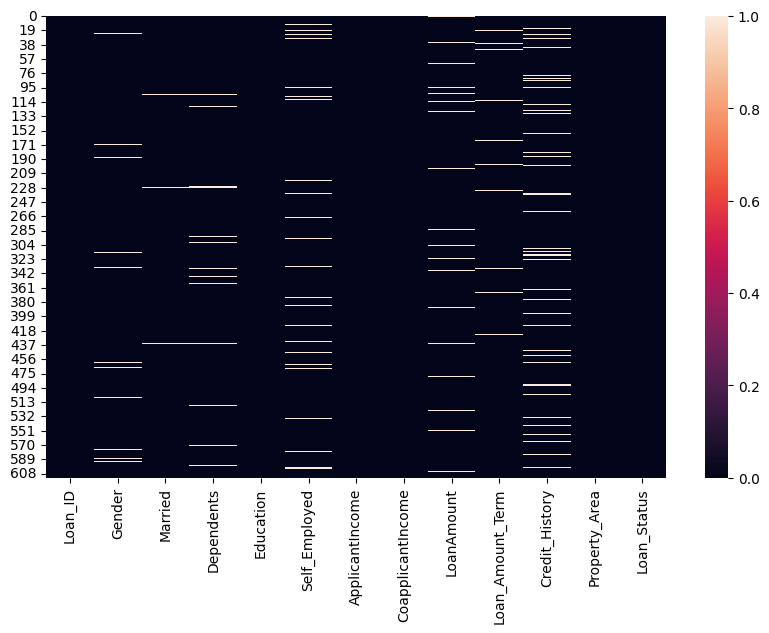

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull()) # this is the heatmap for null values in our dataset
plt.show()

# step 4 --> Prepare data for model training i.e., removing outliers, filling null values etc.

In [18]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Dependents'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Loan_Amount_Term'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [19]:
# filling all NaN values with mode (because they are 'CATEGORICAL') of respective column
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [20]:
# all values of 'Dependent' column are in string form, now converting to int form
df['Dependents'] = df['Dependents'].replace('3+', int(3)) # we replace 3+ (str type) to 3 (int type)
df['Dependents'] = df['Dependents'].replace('1', int(1)) # we replace 1 (str type) to 1 (int type)
df['Dependents'] = df['Dependents'].replace('2', int(2)) # we replace 2 (str type) to 2 (int type)
df['Dependents'] = df['Dependents'].replace('0', int(0)) # we replace 0 (str type) to 0 (int type)

In [21]:
# filling all NaN values of 'LoanAmount' & 'Loan_Amount_Term' column with median (because they are numerical) of their respective column
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [22]:
# rechecking if there is any null value in any column or not
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


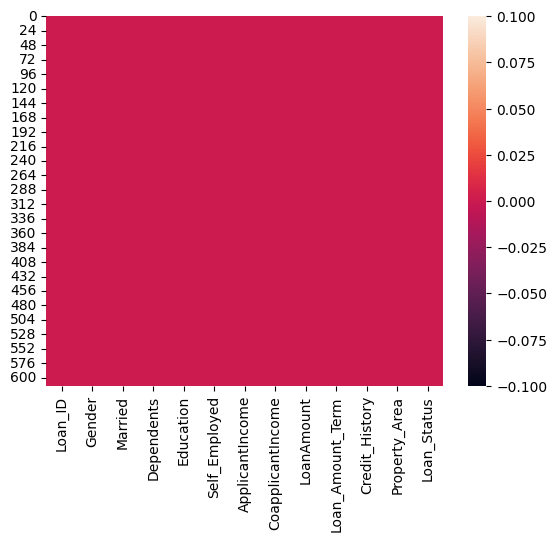

In [24]:
# heatmap for null values
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

# step 5 --> changing/encoding all text (string) values to numerical (0 & 1) value

In [25]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [26]:
# df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [27]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [28]:
# so, as you can see that all the text (string) values converted or you can say encoded to 0 & 1 accordingly.
# but there is a problem that it goes with alphabetical order matlab jese 'Property_Area' waley column mein Urban, Rural aur Semiurban krke values hain
# to R --> 0, S --> 1 & U --> 2 unke alphabetical order ke hisab se 0, 1, 2 assign kiya hai.

In [29]:
# jab bhi "drop" method ka use karein to "inplace = True" jarur likhein.
# agar esa nahi karoge to iske baad jo bhi tum dataset ko lekar work karoge to usmein error aayegi hiaayegi.
df.drop(['Loan_ID'], axis=1, inplace=True) # this column is no longer needed according to our requirement.
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# step 6 --> split x,y into train and test -> fit the model ->
> # check the score of train and test data.



In [30]:
y=df[['Loan_Status']]
X=df.drop(['Loan_Status'],axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
model_lrc=LogisticRegression(solver='liblinear')

In [33]:
model_lrc.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
print('score of train data = ',model_lrc.score(X_train,y_train))
print('score of test data = ',model_lrc.score(X_test,y_test))

score of train data =  0.8018648018648019
score of test data =  0.8324324324324325


In [35]:
model_dtc=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [36]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
print('score of train data = ',model_dtc.score(X_train,y_train))
print('score of test data = ',model_dtc.score(X_test,y_test))

score of train data =  0.8181818181818182
score of test data =  0.8108108108108109


In [38]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=150, base_estimator=model_dtc) # using Decision Tree Classifier
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print("Score of Train Model using DTC = ",bgcl.score(X_train,y_train)) # score is 80%
print("Score of Test Model using DTC = ",bgcl.score(X_test,y_test)) # score is 82%

Score of Train Model using DTC =  0.8088578088578089
Score of Test Model using DTC =  0.827027027027027


In [40]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=150, base_estimator=model_lrc)
abcl = abcl.fit(X_train,y_train)
y_predict = abcl.predict(X_test)
print("Score of Train Model using LRC= ",abcl.score(X_train,y_train)) # score is 80%
print("Score of Test Model using LRC = ",abcl.score(X_test,y_test)) # score is 83%

Score of Train Model using LRC=  0.8018648018648019
Score of Test Model using LRC =  0.8324324324324325


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=55, max_depth=2)
gbcl = gbcl.fit(X_train,y_train)
y_predict = gbcl.predict(X_test)
print("Score of Train Model = ",gbcl.score(X_train,y_train)) # score is 82%
print("Score of Test Model = ",gbcl.score(X_test,y_test)) # score is 81%

Score of Train Model =  0.8298368298368298
Score of Test Model =  0.8108108108108109


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=5, max_features=5)
rfcl = rfcl.fit(X_train,y_train)
# y_predict = rfcl.predict(X_test)
print("Score of Train Model = ",rfcl.score(X_train,y_train)) # score is 82% ya 83% --> ye to har baar change hota hai
print("Score of Test Model = ",rfcl.score(X_test,y_test)) # score is 82%

Score of Train Model =  0.8344988344988346
Score of Test Model =  0.827027027027027


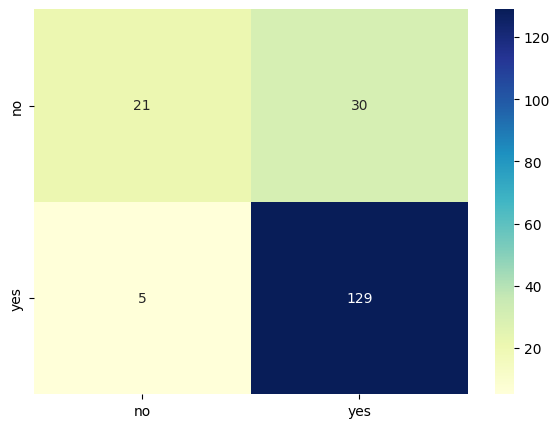

In [43]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                     columns = [i for i in ["no","yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True, fmt='g', cmap='YlGnBu')
plt.show()

In [45]:
# from scipy.stats import zscore

# XScaled =X.apply(zscore) # convert all attributes to z-scale

# XScaled.describe()

# step 7 --> Predict the score

In [51]:
y_predict = model_dtc.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test,y_predict)

0.05253146034533207